# Project 1 – Red Wine Classification

In [605]:
from sklearn.datasets import load_wine
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

In [606]:
wine_data = pd.read_csv("winequality-red.csv")

### EDA on Dataset

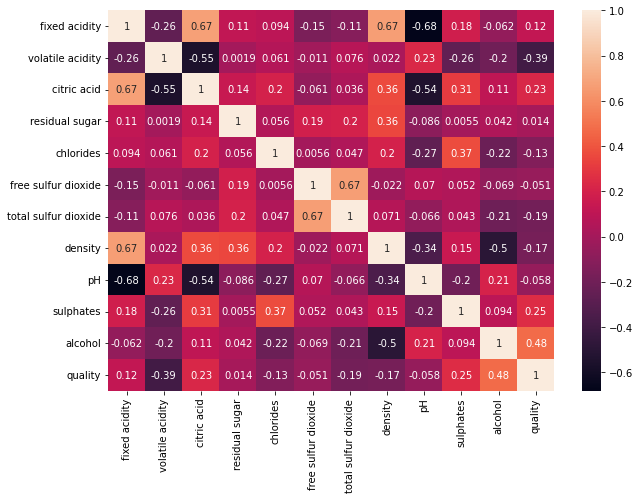

In [607]:
fig , ax = plt.subplots(figsize = (10,7))
sns.heatmap(wine_data.corr() , annot = True , ax = ax)
plt.show()

In [608]:
wine_data.corr().quality.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Some of the features have very little effect on prediction quality so decided to remove them.

### Features Analysis using histograms

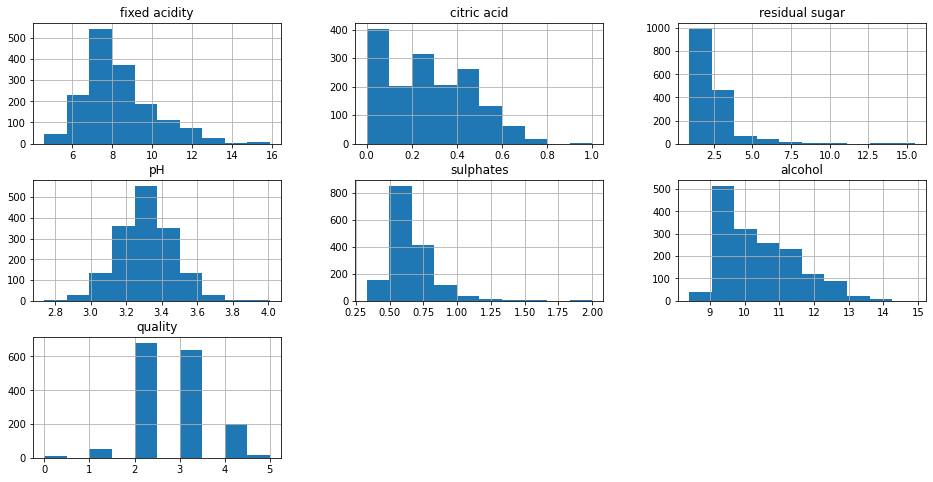

In [642]:
histograms = wine_data.hist(figsize=(16,8))

In [609]:
del wine_data['chlorides']
del wine_data['density']
del wine_data['volatile acidity']
del wine_data['total sulfur dioxide']
del wine_data['free sulfur dioxide']

###  Data Preprocessing

In [610]:
wine_data.reset_index(drop=True)

,fixed acidity,citric acid,residual sugar,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,3.51,0.56,9.4,5
1,7.8,0.00,2.6,3.20,0.68,9.8,5
2,7.8,0.04,2.3,3.26,0.65,9.8,5
3,11.2,0.56,1.9,3.16,0.58,9.8,6
4,7.4,0.00,1.9,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,3.45,0.58,10.5,5
1595,5.9,0.10,2.2,3.52,0.76,11.2,6
1596,6.3,0.13,2.3,3.42,0.75,11.0,6
1597,5.9,0.12,2.0,3.57,0.71,10.2,5


In [611]:
labels = wine_data.quality.value_counts().sort_index()
labels

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

Clearly class 5 and 6 has the highest potential to effect the quality of reed wine. In next step we are just encoding the classes for better understanding.

In [612]:
wine_data['quality'] = wine_data['quality'].map({3:0,4:1,5:2,6:3,7:4,8:5})
wine_data['quality']

0       2
1       2
2       2
3       3
4       2
       ..
1594    2
1595    3
1596    3
1597    2
1598    3
Name: quality, Length: 1599, dtype: int64

In [613]:
display(wine_data.describe())

,fixed acidity,citric acid,residual sugar,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.270976,2.538806,3.311113,0.658149,10.422983,2.636023
std,1.741096,0.194801,1.409928,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.000000,0.900000,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.090000,1.900000,3.210000,0.550000,9.500000,2.000000
50%,7.900000,0.260000,2.200000,3.310000,0.620000,10.200000,3.000000
75%,9.200000,0.420000,2.600000,3.400000,0.730000,11.100000,3.000000
max,15.900000,1.000000,15.500000,4.010000,2.000000,14.900000,5.000000


In [614]:
wine_data1= wine_data.rename(columns={'fixed acidity':'fixed_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar'})

In [615]:
feature = ['fixed_acidity', 'citric_acid', 'residual_sugar','pH', 'sulphates', 'alcohol']

Normalizing the dataset

In [616]:
df1_norm = wine_data1[feature].apply(lambda x :( (x - x.min()) / (x.max()-x.min()) ) )

In [617]:
df1_norm

,fixed_acidity,citric_acid,residual_sugar,pH,sulphates,alcohol
0,0.247788,0.00,0.068493,0.606299,0.137725,0.153846
1,0.283186,0.00,0.116438,0.362205,0.209581,0.215385
2,0.283186,0.04,0.095890,0.409449,0.191617,0.215385
3,0.584071,0.56,0.068493,0.330709,0.149701,0.215385
4,0.247788,0.00,0.068493,0.606299,0.137725,0.153846
...,...,...,...,...,...,...
1594,0.141593,0.08,0.075342,0.559055,0.149701,0.323077
1595,0.115044,0.10,0.089041,0.614173,0.257485,0.430769
1596,0.150442,0.13,0.095890,0.535433,0.251497,0.400000
1597,0.115044,0.12,0.075342,0.653543,0.227545,0.276923


### Test Train Split

In [618]:
X = df1_norm
y = wine_data1['quality']

In [619]:
X_train, X_test, y_train, y_test = train_test_split(X, yy, test_size = 0.2, random_state = 0)

In [620]:
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1279, 6)
X_test shape is  (320, 6)
y_train shape is  (1279,)
y_test shape is  (320,)


### Scale the Dataset to fit for tf.estimator

In [621]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [622]:
x_train_scaled

array([[0.46428571, 0.45      , 0.09589041, 0.51181102, 0.15337423,
        0.15384615],
       [0.54464286, 0.45      , 0.16438356, 0.30708661, 0.10429448,
        0.18461538],
       [0.46428571, 0.55      , 0.08219178, 0.40944882, 0.25766871,
        0.33846154],
       ...,
       [0.28571429, 0.31      , 0.07534247, 0.43307087, 0.19631902,
        0.16923077],
       [0.74107143, 0.49      , 0.23287671, 0.44094488, 0.19018405,
        0.66153846],
       [0.45535714, 0.32      , 0.09589041, 0.4015748 , 0.06748466,
        0.15384615]])

### Create Feature Column

In [624]:
feat_col=[tf.feature_column.numeric_column("x",shape=[6])]
feat_col

[NumericColumn(key='x', shape=(6,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

### Create a TF estimator DNN model

In [625]:
deep_model_tf=tf.estimator.DNNClassifier(hidden_units=[512,256,128],feature_columns=feat_col,n_classes=6,optimizer=tf.train.AdamOptimizer(learning_rate=0.01),dropout=None,
                                    batch_norm=False,activation_fn=tf.nn.softmax)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\SAHILS~1\\AppData\\Local\\Temp\\tmpvaz6f6jl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000291B410E7F0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Create Functions 

In [651]:
input_fn = tf.estimator.inputs.numpy_input_fn(x={'x':x_train_scaled},y=y_train,shuffle=True,batch_size=50,num_epochs=50)

In [648]:
eval_func = tf.estimator.inputs.numpy_input_fn({'x':x_test_scaled},y=y_test,shuffle=False,batch_size=10,num_epochs=10)

### Train Model 

In [652]:
deep_model_tf.train(input_fn=input_fn,steps=1200)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SAHILS~1\AppData\Local\Temp\tmpvaz6f6jl\model.ckpt-1200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1200 into C:\Users\SAHILS~1\AppData\Local\Temp\tmpvaz6f6jl\model.ckpt.
INFO:tensorflow:loss = 54.475395, step = 1201
INFO:tensorflow:global_step/sec: 188.287
INFO:tensorflow:loss = 47.84202, step = 1301 (0.535 sec)
INFO:tensorflow:global_step/sec: 223.206
INFO:tensorflow:loss = 45.626842, step = 1401 (0.446 sec)
INFO:tensorflow:global_step/sec: 222.724
INFO:tensorflow:loss = 40.59529, step = 1501 (0.450 sec)
INFO:tensorflow:global_step/sec: 225.471
INFO:tensorflow:loss = 54.720173, step = 1601 (0.444 sec)
INFO:tensorflow:global_step/sec: 222.206
INFO:tensorflow:loss = 54.724953, step = 1701 (0.449 sec)
INFO:te

In [654]:
deep_model_tf.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-10-10T14:30:00Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SAHILS~1\AppData\Local\Temp\tmpvaz6f6jl\model.ckpt-2400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-10-10-14:30:02
INFO:tensorflow:Saving dict for global step 2400: accuracy = 0.596875, average_loss = 0.9462937, global_step = 2400, loss = 9.462937
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2400: C:\Users\SAHILS~1\AppData\Local\Temp\tmpvaz6f6jl\model.ckpt-2400


{'accuracy': 0.596875,
 'average_loss': 0.9462937,
 'loss': 9.462937,
 'global_step': 2400}

1. Loss is always on higher side despite increasing hidden layers nodes
2. Tried Different optimizers but havent achived accuarcy more 60%

## Modeling Neural Network using TF.Keras 

In [ ]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)

In [637]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Input(shape = 6,))
ann.add(tf.keras.layers.Dense(units = 64 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 32 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))
ann.add(tf.keras.layers.Dense(units = 6 , activation = "softmax"))
ann.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_21 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 102       
Total params: 3,158
Trainable params: 3,158
Non-trainable params: 0
_________________________________________________________________


In [638]:
ann.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])

In [639]:
history = ann.fit(x_train_scaled, y_train_cat,  batch_size= 32, epochs = 150 , validation_data = (X_test,y_test_cat))

Train on 1279 samples, validate on 320 samples
Epoch 1/150
1279/1279 [==============================] - 0s 319us/sample - loss: 1.6758 - acc: 0.2799 - val_loss: 1.5206 - val_acc: 0.4437
Epoch 2/150
1279/1279 [==============================] - 0s 127us/sample - loss: 1.3780 - acc: 0.3878 - val_loss: 1.1941 - val_acc: 0.4437
Epoch 3/150
1279/1279 [==============================] - 0s 79us/sample - loss: 1.2200 - acc: 0.4418 - val_loss: 1.1398 - val_acc: 0.4531
Epoch 4/150
1279/1279 [==============================] - 0s 71us/sample - loss: 1.1807 - acc: 0.5403 - val_loss: 1.1080 - val_acc: 0.5531
Epoch 5/150
1279/1279 [==============================] - 0s 73us/sample - loss: 1.1379 - acc: 0.5418 - val_loss: 1.0781 - val_acc: 0.5875
Epoch 6/150
1279/1279 [==============================] - 0s 77us/sample - loss: 1.1026 - acc: 0.5450 - val_loss: 1.0460 - val_acc: 0.5844
Epoch 7/150
1279/1279 [==============================] - 0s 72us/sample - loss: 1.0751 - acc: 0.5465 - val_loss: 1.0147 - v

1279/1279 [==============================] - 0s 78us/sample - loss: 0.9558 - acc: 0.6067 - val_loss: 0.9171 - val_acc: 0.6500
Epoch 60/150
1279/1279 [==============================] - 0s 74us/sample - loss: 0.9505 - acc: 0.5973 - val_loss: 0.9162 - val_acc: 0.6438
Epoch 61/150
1279/1279 [==============================] - 0s 76us/sample - loss: 0.9437 - acc: 0.6044 - val_loss: 0.9337 - val_acc: 0.6187
Epoch 62/150
1279/1279 [==============================] - 0s 69us/sample - loss: 0.9393 - acc: 0.6036 - val_loss: 0.9442 - val_acc: 0.6094
Epoch 63/150
1279/1279 [==============================] - 0s 72us/sample - loss: 0.9378 - acc: 0.6028 - val_loss: 0.9233 - val_acc: 0.6313
Epoch 64/150
1279/1279 [==============================] - 0s 165us/sample - loss: 0.9381 - acc: 0.6091 - val_loss: 0.9610 - val_acc: 0.5813
Epoch 65/150
1279/1279 [==============================] - 0s 72us/sample - loss: 0.9427 - acc: 0.6052 - val_loss: 0.9184 - val_acc: 0.6469
Epoch 66/150
1279/1279 [===============

Epoch 118/150
1279/1279 [==============================] - 0s 71us/sample - loss: 0.9084 - acc: 0.6145 - val_loss: 0.9546 - val_acc: 0.5969
Epoch 119/150
1279/1279 [==============================] - 0s 70us/sample - loss: 0.9097 - acc: 0.6224 - val_loss: 0.9340 - val_acc: 0.6125
Epoch 120/150
1279/1279 [==============================] - 0s 70us/sample - loss: 0.9064 - acc: 0.6208 - val_loss: 0.9171 - val_acc: 0.6500
Epoch 121/150
1279/1279 [==============================] - 0s 68us/sample - loss: 0.9078 - acc: 0.6231 - val_loss: 0.9320 - val_acc: 0.6250
Epoch 122/150
1279/1279 [==============================] - 0s 69us/sample - loss: 0.9060 - acc: 0.6153 - val_loss: 0.9067 - val_acc: 0.6469
Epoch 123/150
1279/1279 [==============================] - 0s 69us/sample - loss: 0.9145 - acc: 0.6067 - val_loss: 0.9491 - val_acc: 0.6062
Epoch 124/150
1279/1279 [==============================] - 0s 70us/sample - loss: 0.9075 - acc: 0.6122 - val_loss: 0.9099 - val_acc: 0.6500
Epoch 125/150
1279/1

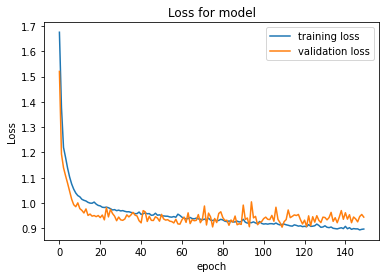

In [640]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Loss for model')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

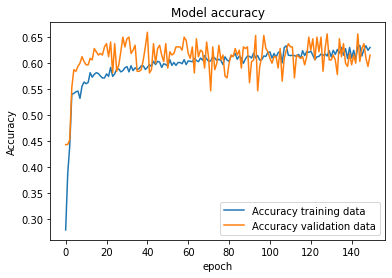

In [641]:
plt.plot(history.history['acc'], label='Accuracy training data')
plt.plot(history.history['val_acc'], label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

1. Keras model also has higher loss as with the TF estimator
2. Used all the combinations to increase the accuracy but failed
3. Same model on different dataset performed with over 90% accuracy. Dont Know Why! Need more time to dig out